In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [24]:
data = pd.read_csv('C:/Users/ksmin/data_Science/dataset/test.csv')
pd.set_option('display.max_columns', None) # all column
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column, i.e., price range
data

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
5,6,1464,1,2.9,1,5,1,50,0.8,198,8,9,569,939,3506,10,7,3,1,1,1
6,7,1718,0,2.4,0,1,0,47,1.0,156,2,3,1283,1374,3873,14,2,10,0,0,0
7,8,833,0,2.4,1,0,0,62,0.8,111,1,2,1312,1880,1495,7,2,18,0,1,1
8,9,1111,1,2.9,1,9,1,25,0.6,101,5,19,556,876,3485,11,9,10,1,1,0
9,10,1520,0,0.5,0,1,0,25,0.5,171,3,20,52,1009,651,6,0,5,1,0,1


In [14]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfcolumns = pd.DataFrame(X.columns)
dfscores = pd.DataFrame(fit.scores_)

#concatenate two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs', 'Score']  #name the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

          Specs       Score
13     px_width  852.914979
14          ram  562.837207
0            id  223.566155
12    px_height   46.347162
9     mobile_wt   42.328627
5            fc   15.793117
11           pc   11.148155
7    int_memory    1.372252
3   clock_speed    1.052762
16         sc_w    0.809077


In [16]:
#importance Scoring
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

[0.05902471 0.05818694 0.03179994 0.05890804 0.02943675 0.05600608
 0.0254476  0.05443396 0.0551446  0.06139025 0.05166932 0.05552054
 0.06004279 0.06105182 0.06088047 0.05584989 0.05525395 0.05717747
 0.02183999 0.03093491]


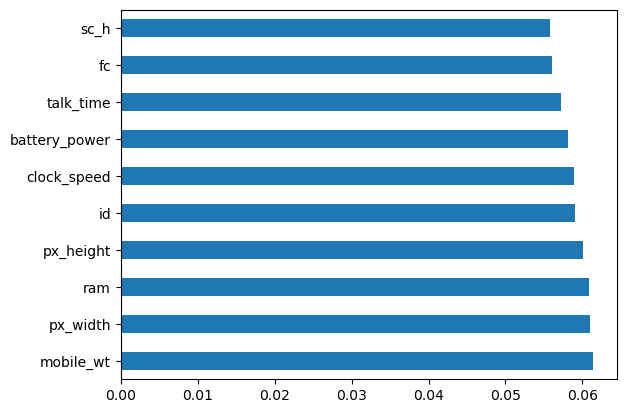

In [25]:
model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #use built-in class feature_importances of tree-based classifiers
#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

plt.show()

In [20]:
import seaborn as sns

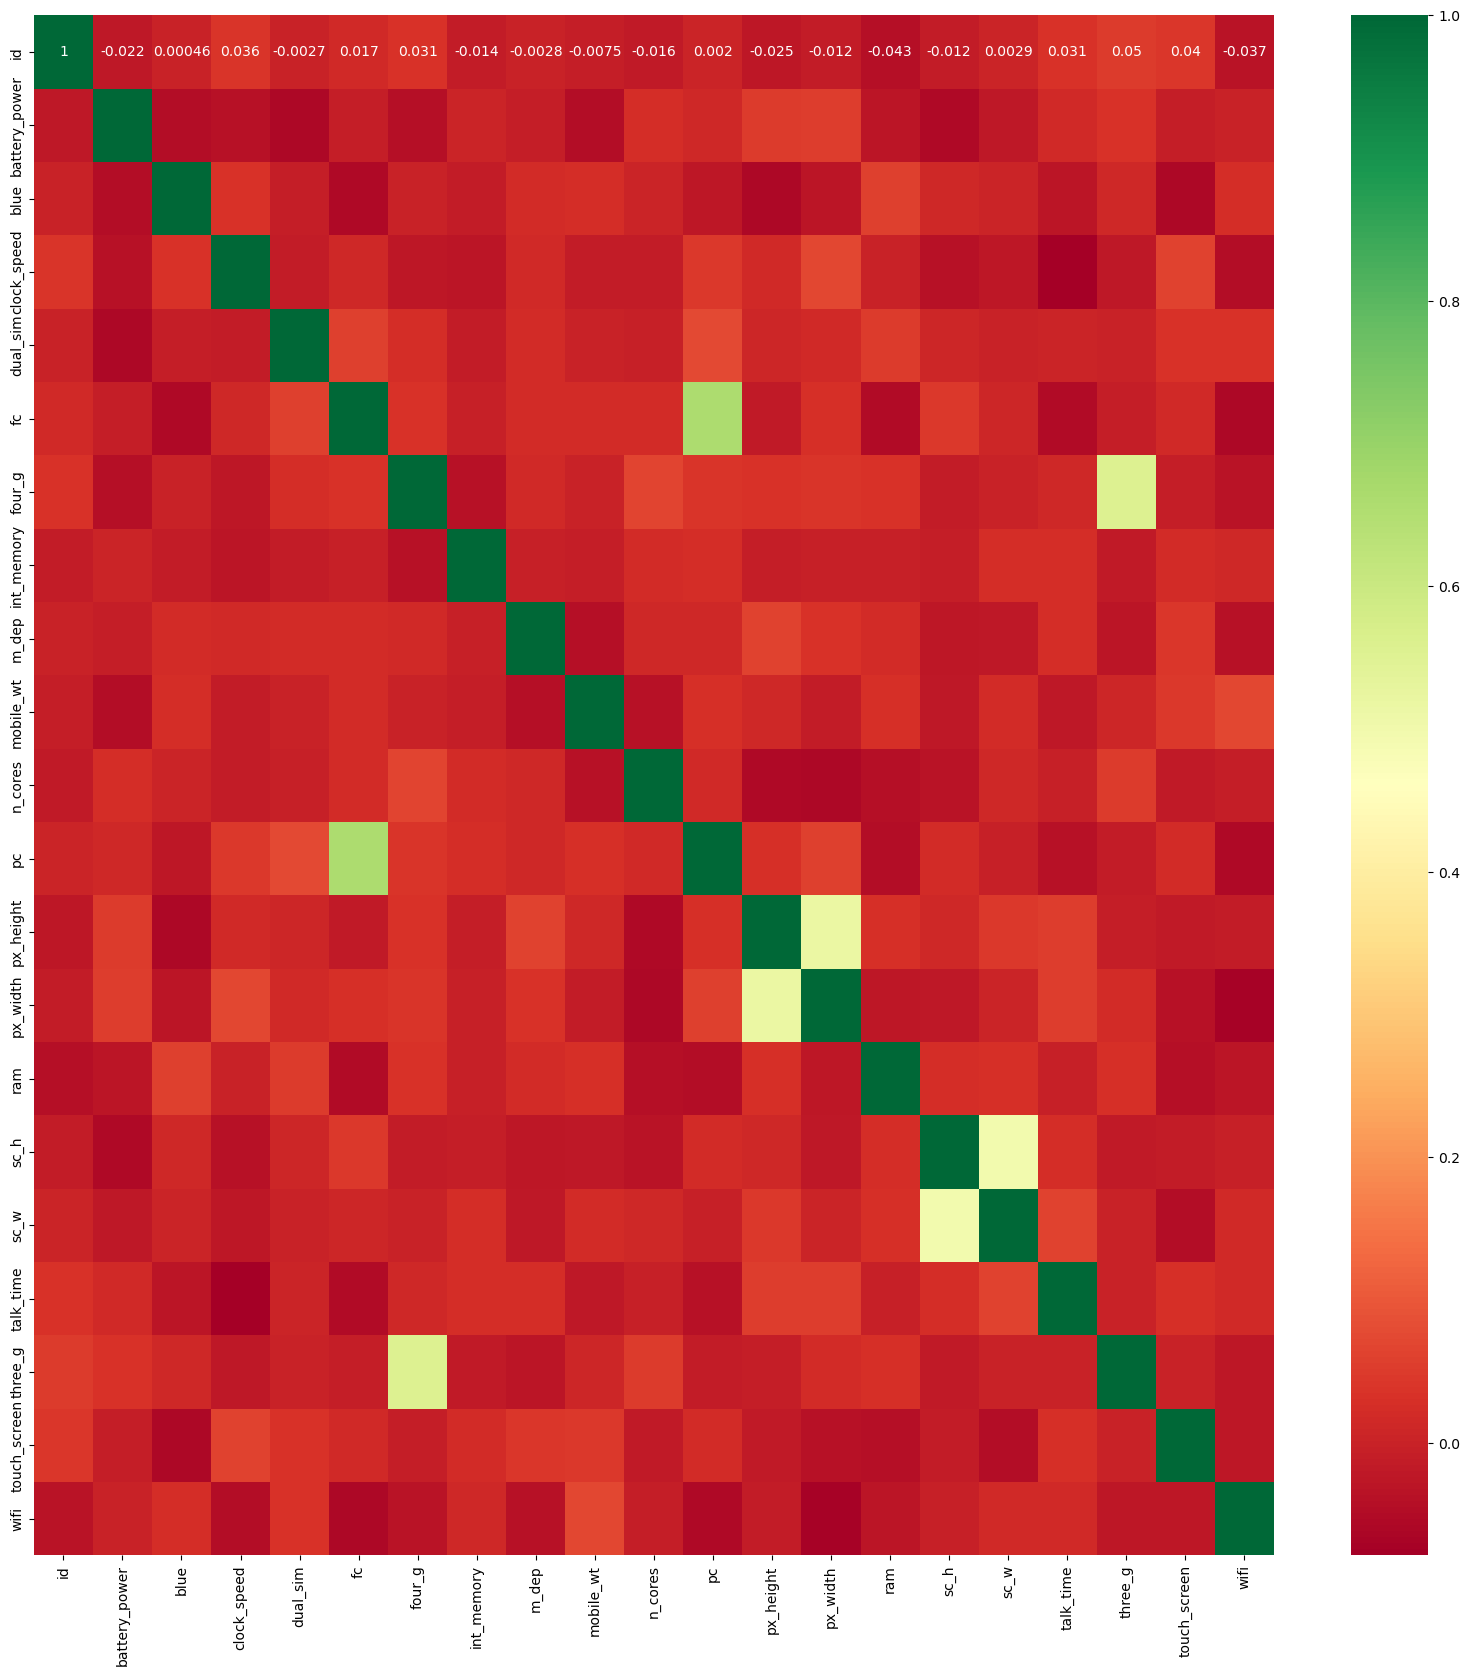

In [21]:
#seaborn으로 hitmap 만들기.
#get correlations of pairs of features in the dataset
corrmat = data.corr() #corr() computes pairwise  correlations of features in a Data Frame
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot the heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")